In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import median
import random
sns.set_context("talk")
sns.set_style("darkgrid")
from collections import Counter

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import log_loss, roc_curve
from sklearn.metrics import auc

In [3]:
from adjustText import adjust_text

In [4]:
base_dir = pathlib.Path("../2.data_split/model_data/")
cp_data_dir = pathlib.Path(f"{base_dir}/cp/")
l1000_data_dir = pathlib.Path(f"{base_dir}/L1/")

In [5]:
cp_test = f"{cp_data_dir}/test_lvl4_data_targets_pathways.csv.gz"
L1000_test = f"{l1000_data_dir}/test_lvl4_data_targets_pathways.csv.gz"

In [6]:
model_preds_dir = pathlib.Path("../L1000_CP_model_predictions/")
model_preds_figures = pathlib.Path("moa_predictions_figures")

In [7]:
df_cp_test = pd.read_csv(cp_test, compression='gzip',low_memory = False)
df_L1000_test = pd.read_csv(L1000_test, compression='gzip',low_memory = False)
# df_cp_L1000_test = pd.read_csv(cp_L1000_test, compression='gzip',low_memory = False)

In [8]:
##mlknn
df_cp_mlknn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_mlknn.csv'))
df_L1000_mlknn_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_mlknn.csv'))
# df_cp_L1000_mlknn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_pathway_preds_mlknn.csv'))

In [9]:
##resnet
df_cp_resnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_resnet.csv'))
df_L1000_resnet_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_resnet.csv'))
# df_cp_L1000_resnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_resnet.csv'))

In [10]:
##1-d cnn
df_cp_cnn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_1dcnn.csv'))
df_L1000_cnn_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_1dcnn.csv'))
# df_cp_L1000_cnn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_1dcnn.csv'))

In [11]:
##tabnet
df_cp_tabnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_tabnet.csv'))
df_L1000_tabnet_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_tabnet.csv'))
# df_cp_L1000_tabnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_tabnet.csv'))

In [12]:
##Simple NN
df_cp_simplenn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_simplenn.csv'))
df_L1000_simplenn_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_simplenn.csv'))
# df_cp_L1000_simplenn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_simplenn.csv'))

In [13]:
#blend
df_cp_blend_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_blend.csv'))
df_L1000_blend_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_blend.csv'))
# df_cp_L1000_blend_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_blend.csv'))

##### - Shuffled test predictions

In [14]:
##mlknn shuffle
df_cp_mlknn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_mlknn_shuffle.csv'))
df_L1000_mlknn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_mlknn_shuffle.csv'))
# df_cp_L1000_mlknn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_mlknn_shuffle.csv'))

In [15]:
##resnet shuffle
df_cp_resnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_resnet_shuffle.csv'))
df_L1000_resnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_resnet_shuffle.csv'))
# df_cp_L1000_resnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_resnet_shuffle.csv'))

In [16]:
##1-d cnn shuffle
df_cp_cnn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_1dcnn_shuffle.csv'))
df_L1000_cnn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_1dcnn_shuffle.csv'))
# df_cp_L1000_cnn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_1dcnn_shuffle.csv'))

In [17]:
##tabnet shuffle
df_cp_tabnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_tabnet_shuffle.csv'))
df_L1000_tabnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_tabnet_shuffle.csv'))
# df_cp_L1000_tabnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_tabnet_shuffle.csv'))

In [18]:
##simpleNN shuffle
df_cp_simplenn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_pathway_preds_simplenn_shuffle.csv'))
df_L1000_simplenn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_pathway_preds_simplenn_shuffle.csv'))
# df_cp_L1000_simplenn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_simplenn_shuffle.csv'))

In [19]:
df_cp_blend_test.shape

(10788, 772)

In [20]:
df_cp_tst_target_pathways = df_cp_test[df_cp_cnn_test.columns].copy()
df_L1000_tst_targets_pathways = df_L1000_test[df_L1000_cnn_test.columns].copy()
# df_cp_L1000_tst_targets = df_cp_L1000_test[df_cp_L1000_cnn_test.columns]

##### - Baseline of Precision-Recall AUC score is determined by the ratio of positives (P i.e. 1) to ratio of positives (P i.e. 1) and negatives (N i.e. 0) i.e. y = P / (P + N)

In [21]:
def calculate_baseline(df):
  """Calculate the PR- baseline (i.e. P/P+N) for each profiling assay"""
  targts = np.ravel(df.values)
  targts_one = [values for num in np.where(targts == 1) for values in num]
  baseline = len(targts_one) / len(targts)
  return baseline

In [22]:
cp_no_skill = calculate_baseline(df_cp_tst_target_pathways)
L1000_no_skill = calculate_baseline(df_L1000_tst_targets_pathways)
# cp_L1000_no_skill = calculate_baseline(df_cp_L1000_tst_targets)

In [23]:
L1000_no_skill

0.03076590271000254

In [24]:
cp_no_skill

0.028950561072463934

In [25]:
def evaluate(actual, pred):
  """Evaluate model performance using ROC-AUC and PR-AUC scores"""
  rocauc_score = roc_auc_score(actual.values, pred.values, average='macro')
  pr_auc_score = average_precision_score(actual.values, pred.values, average="micro")
  return [rocauc_score, pr_auc_score]

In [26]:
cp_preds = [df_cp_mlknn_test, df_cp_resnet_test, df_cp_cnn_test, df_cp_tabnet_test, df_cp_simplenn_test, \
            df_cp_mlknn_shuf, df_cp_resnet_shuf, df_cp_cnn_shuf, df_cp_tabnet_shuf, df_cp_simplenn_shuf, \
            df_cp_blend_test]

L1_preds = [df_L1000_mlknn_test, df_L1000_resnet_test, df_L1000_cnn_test, df_L1000_tabnet_test, df_L1000_simplenn_test,
            df_L1000_mlknn_shuf, df_L1000_resnet_shuf, df_L1000_cnn_shuf, df_L1000_tabnet_shuf, df_L1000_simplenn_shuf,
            df_L1000_blend_test]

# cp_L1_preds = [df_cp_L1000_mlknn_test, df_cp_L1000_resnet_test, df_cp_L1000_cnn_test, df_cp_L1000_tabnet_test, df_cp_L1000_simplenn_test, \
#                df_cp_L1000_mlknn_shuf, df_cp_L1000_resnet_shuf, df_cp_L1000_cnn_shuf, df_cp_L1000_tabnet_shuf, \
#                df_cp_L1000_simplenn_shuf,df_cp_L1000_blend_test]

metrics = ['roc_auc_score', 'pr_auc_score',]
model_name = ['_mlknn', '_resnet', '_cnn', '_tabnet', '_simplenn', '_mlknnshuf', '_resnetshuf', '_cnnshuf', '_tabnetshuf', \
              '_simplennshuf', '_blend']
targets_dfs = [df_cp_tst_target_pathways, df_L1000_tst_targets_pathways]
assays = ['CP', 'L1000']
preds_all = [cp_preds, L1_preds]

#### - All models target pathway predictions

In [27]:
##models target pathway predictions for all profiling assays
score_dict = {}
for idx, (assay_name, actual_df) in enumerate(zip(assays, targets_dfs)):
  for mdl, pred_df in zip(model_name, preds_all[idx]):
    model_score = {}
    score_name = assay_name + mdl 
    eval_list = evaluate(actual_df, pred_df)
    for io, met in enumerate(metrics):
      score_dict[score_name] = model_score
      score_dict[score_name][met] = eval_list[io]

In [28]:
df_pred_scores = pd.DataFrame([(k,k1,v1) for k,v in score_dict.items() for k1,v1 in v.items()], 
                              columns = ['id_name', 'metrics', 'values'])

In [29]:
df_pred_scores.head(10)

,id_name,metrics,values
0,CP_mlknn,roc_auc_score,0.525254
1,CP_mlknn,pr_auc_score,0.081711
2,CP_resnet,roc_auc_score,0.626675
3,CP_resnet,pr_auc_score,0.127463
4,CP_cnn,roc_auc_score,0.614740
5,CP_cnn,pr_auc_score,0.112901
6,CP_tabnet,roc_auc_score,0.551333
7,CP_tabnet,pr_auc_score,0.090848
8,CP_simplenn,roc_auc_score,0.616584
9,CP_simplenn,pr_auc_score,0.115857


In [30]:
df_pred_scores['profile_tech'] = df_pred_scores['id_name'].apply(lambda x: '_'.join(x.split('_')[:-1]))
df_pred_scores['model'] = df_pred_scores['id_name'].apply(lambda x: x.split('_')[-1])
df_pred_scores['values'] = df_pred_scores['values'].apply(lambda x: x*100)

In [31]:
df_pred_scores['model'].unique()

array(['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'mlknnshuf',
       'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf', 'blend'],
      dtype=object)

In [32]:
normal_models = ['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'blend']
shuffle_models = ['mlknnshuf', 'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf']

In [33]:
df_score_normal = df_pred_scores.loc[df_pred_scores['model'].isin(normal_models)].reset_index(drop=True)
df_score_shuffle = df_pred_scores.loc[df_pred_scores['model'].isin(shuffle_models)].reset_index(drop=True)

In [34]:
df_score_normal.head()

,id_name,metrics,values,profile_tech,model
0,CP_mlknn,roc_auc_score,52.525375,CP,mlknn
1,CP_mlknn,pr_auc_score,8.171107,CP,mlknn
2,CP_resnet,roc_auc_score,62.667485,CP,resnet
3,CP_resnet,pr_auc_score,12.746348,CP,resnet
4,CP_cnn,roc_auc_score,61.473965,CP,cnn


In [35]:
normal_model_names = {'resnet':'ResNet', 'cnn':'1D-CNN', 'tabnet':'TabNet', 'simplenn':'Simple NN', 'mlknn': 'Ml-KNN', 'blend': 'Models Ensemble'}
shuffle_model_names = {'resnetshuf':'ResNet', 'cnnshuf':'1D-CNN', 'tabnetshuf':'TabNet', 'simplennshuf':'Simple NN','mlknnshuf': 'Ml-KNN'}
def rename_col_values(df, model_name_dict):
  """Rename unique column values"""
  df['metrics'] = df['metrics'].map({'pr_auc_score': 'Precision-Recall_AUC', 'roc_auc_score':'ROC_AUC'})
  df['model'] = df['model'].map(model_name_dict)
  df['profile_tech'] = df['profile_tech'].map({'CP':'Cell painting', 'L1000':'L1000', 'CP_L1000':'Cell painting & L1000'})
  return df

In [36]:
df_score_normal = rename_col_values(df_score_normal, normal_model_names)
df_score_shuffle = rename_col_values(df_score_shuffle, shuffle_model_names)

In [37]:
def extract_new_dfs(df):
  """Extract ROC-AUC & PR-AUC dataframes"""
  df_roc = df[df['metrics'] == 'ROC_AUC'].copy()
  df_pr_auc = df[df['metrics'] == 'Precision-Recall_AUC'].copy()
  return df_roc, df_pr_auc

In [38]:
df_roc_normal, df_pr_auc_normal = extract_new_dfs(df_score_normal)
df_roc_shuffle, df_pr_auc_shuffle = extract_new_dfs(df_score_shuffle)

In [39]:
# Output files
full_results_df = pd.concat([
    df_pr_auc_normal.assign(shuffle=False),
    df_roc_normal.assign(shuffle=False),
    df_pr_auc_shuffle.assign(shuffle=True),
    df_roc_shuffle.assign(shuffle=True)
])

output_file = pathlib.Path("performance_results/all_pathway_performance_metrics.csv")
full_results_df.to_csv(output_file, index=False)

print(full_results_df.shape)
full_results_df.head()

(44, 6)


,id_name,metrics,values,profile_tech,model,shuffle
1,CP_mlknn,Precision-Recall_AUC,8.171107,Cell painting,Ml-KNN,False
3,CP_resnet,Precision-Recall_AUC,12.746348,Cell painting,ResNet,False
5,CP_cnn,Precision-Recall_AUC,11.290066,Cell painting,1D-CNN,False
7,CP_tabnet,Precision-Recall_AUC,9.084820,Cell painting,TabNet,False
9,CP_simplenn,Precision-Recall_AUC,11.585693,Cell painting,Simple NN,False


### - Plot Models -- Normal, Shuffle Models

##### - Baseline of Precision-Recall AUC score is determined by the ratio of positives (P i.e. 1) to ratio of positives (P i.e. 1) and negatives (N i.e. 0) i.e. y = P / (P + N)

In [40]:
pr_baseline = ((cp_no_skill + L1000_no_skill) * 100)/2

In [41]:
def plot_model_predictions(df, baseline, file_name, txt_cord_y = 3.15, y_label= "Precision-Recall AUC %", title_label="Precision-Recall AUC score for all models", 
                           path = model_preds_figures):
  """Plot model predictions for all profiling assays"""
  if not os.path.exists(path):
        os.mkdir(path)
  cat_plt = sns.catplot(x="model", y="values", 
                        hue="profile_tech", data=df, kind="bar", palette='gray', 
                        height=6, aspect=2.2)
  cat_plt._legend.set_title('')
  cat_plt.set_axis_labels("Models", y_label)
  cat_plt.fig.suptitle(title_label)
  cat_plt.fig.subplots_adjust(top=.91)
  plt.axhline(baseline, ls='--', linewidth=3, color='red')
  plt.text(-0.42,txt_cord_y, "Baseline", color='red')
  plt.savefig(os.path.join(path, file_name))
  plt.show()

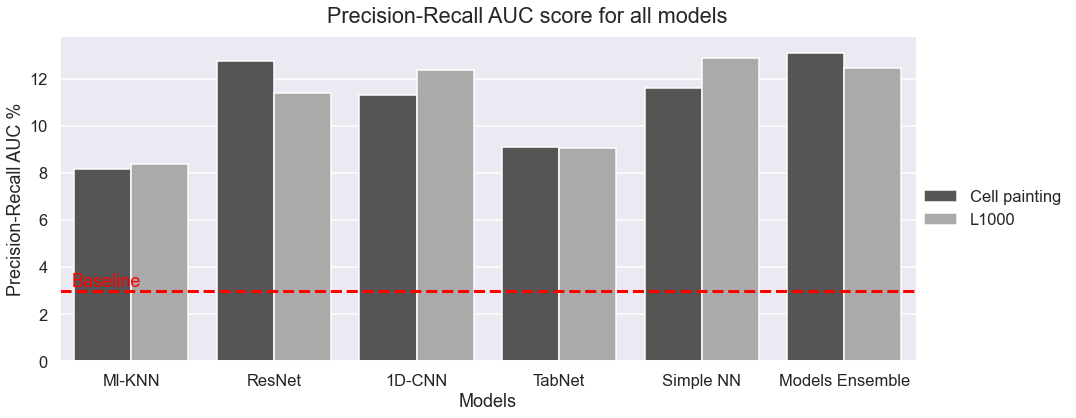

In [42]:
plot_model_predictions(df_pr_auc_normal, pr_baseline, "pr_auc_all_assays_pathways.png")

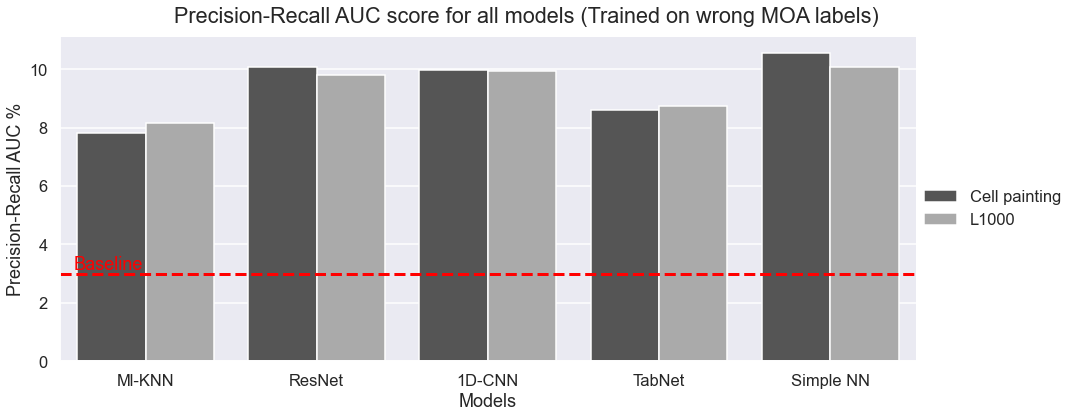

In [43]:
plot_model_predictions(df_pr_auc_shuffle, pr_baseline, "pr_auc_all_assays_pathways_wrong_labels.png", txt_cord_y = 3.15, 
                       title_label="Precision-Recall AUC score for all models (Trained on wrong MOA labels)")

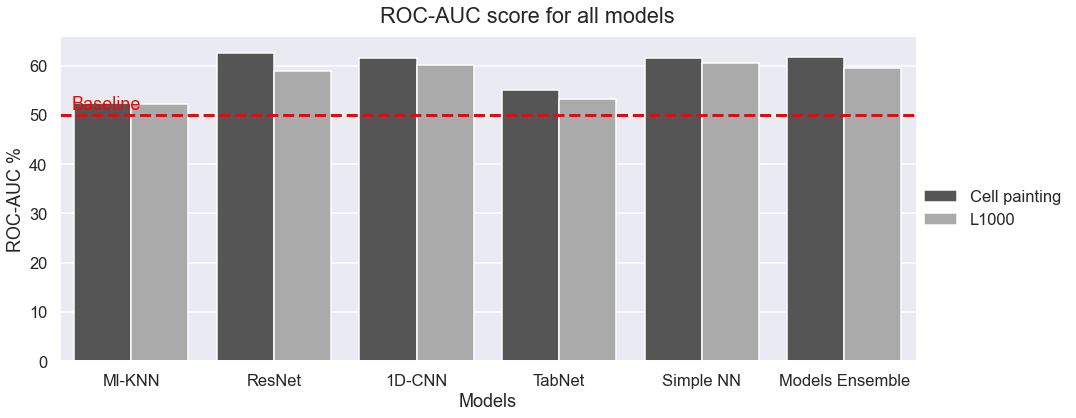

In [44]:
plot_model_predictions(df_roc_normal, 50, "roc_auc_all_assays_pathways.png", txt_cord_y = 51, y_label= "ROC-AUC %", title_label="ROC-AUC score for all models")

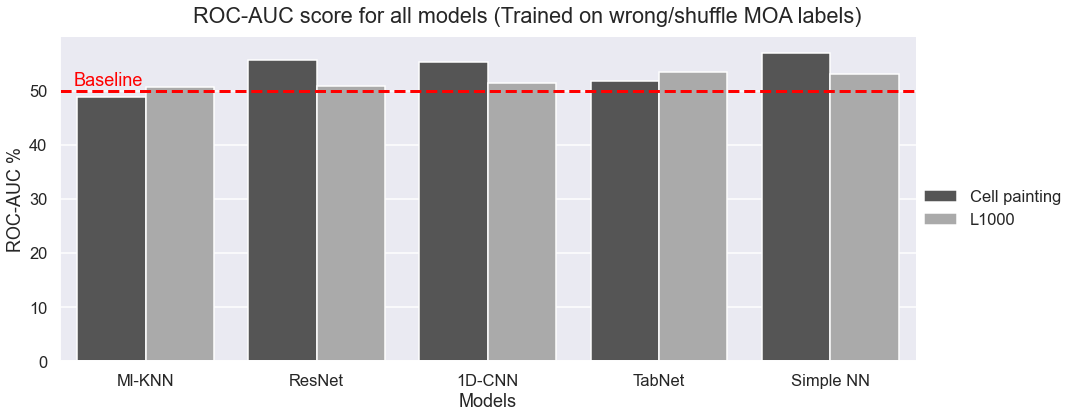

In [45]:
plot_model_predictions(df_roc_shuffle, 50, "roc_auc_all_assays_pathways_wrong_labels.png", txt_cord_y = 51, y_label= "ROC-AUC %", 
                       title_label="ROC-AUC score for all models (Trained on wrong/shuffle MOA labels)")

### - MOA Pathways predictions PER Dose treatment

In [46]:
df_cp_test.rename(columns={'Metadata_dose_recode': "dose"}, inplace = True)

In [47]:
df_cp_test['dose'].unique()

array([6, 5, 4, 3, 2, 1, 7])

In [48]:
def get_actual_preds_dose(dose, df_test, df_model_preds, df_targets):
  """Get the actual MOA target labels and predictions for each Treatment dose"""
  dose_cpds_index = df_test[df_test['dose'] == dose].index
  df_dose_preds = df_model_preds.loc[dose_cpds_index].reset_index(drop = True)
  df_dose_targets = df_targets.loc[dose_cpds_index].reset_index(drop = True)
  return df_dose_targets, df_dose_preds

In [49]:
def dose_class_baseline(dose_num, df_test, df_targets):
  """Calculate the PR- baseline for each dose treatment"""
  dose_cpds_index = df_test[df_test['dose'] == dose_num].index
  df_class_targets = df_targets.loc[dose_cpds_index].reset_index(drop = True)
  class_baseline_score = calculate_baseline(df_class_targets)
  return class_baseline_score

In [50]:
dose_num = [1,2,3,4,5,6]

##### - The baseline pr-auc score for each dose is the same across all profiling assays i.e. the baseline score in CP == baseline score in L1000

In [51]:
dose_no_skill_scrs = {}
for num in dose_num:
  class_name = 'dose_class_' + str(num)
  no_skill_score = dose_class_baseline(num, df_cp_test, df_cp_tst_target_pathways)
  dose_no_skill_scrs[class_name] = no_skill_score

In [52]:
dose_no_skill_scrs

{'dose_class_1': 0.03411081835405646,
 'dose_class_2': 0.03411081835405646,
 'dose_class_3': 0.03411081835405646,
 'dose_class_4': 0.03411081835405646,
 'dose_class_5': 0.03411081835405646,
 'dose_class_6': 0.03411081835405646}

In [53]:
def evaluate(actual, pred):
  """Evaluate MOA predictions per dose using PR-AUC and ROC-AUC"""
  rocauc_score = roc_auc_score(np.ravel(actual), np.ravel(pred), average='macro')
  pr_auc_score = average_precision_score(np.ravel(actual), np.ravel(pred), average="micro")
  return [rocauc_score, pr_auc_score]

In [54]:
cp_preds_dose = [df_cp_mlknn_test, df_cp_resnet_test, df_cp_cnn_test, df_cp_tabnet_test, df_cp_simplenn_test, df_cp_blend_test]

L1_preds_dose = [df_L1000_mlknn_test, df_L1000_resnet_test, df_L1000_cnn_test, df_L1000_tabnet_test, df_L1000_simplenn_test, 
                 df_L1000_blend_test]

# cp_L1_preds_dose = [df_cp_L1000_mlknn_test, df_cp_L1000_resnet_test, df_cp_L1000_cnn_test, df_cp_L1000_tabnet_test, 
                    # df_cp_L1000_simplenn_test, df_cp_L1000_blend_test]

In [55]:
def dose_class_preds(assay_name, df_val, df_targets, model_preds, dose_num = dose_num):
  """Compute the evaluation scores for each dose treatment across all models for each profiling assay"""
  metrics = ['roc_auc_score', 'pr_auc_score',]
  model_name = ['mlknn_', 'resnet_', 'cnn_', 'tabnet_', 'simplenn_']
  class_results = {}
  for num in dose_num:
    for pred, mdl in zip(model_preds, model_name):
      metric_dict = {}
      class_name = 'moa_dose_' + assay_name + mdl + str(num)
      actual_, pred_ = get_actual_preds_dose(num, df_val, pred, df_targets)
      eval_list = evaluate(actual_, pred_)
      for idx, met in enumerate(metrics):
        class_results[class_name] = metric_dict
        class_results[class_name][met] = eval_list[idx]

  return class_results

In [56]:
cp_dose_preds = dose_class_preds('cp_', df_cp_test, df_cp_tst_target_pathways, cp_preds_dose)
L1000_dose_preds = dose_class_preds('L1000_', df_L1000_test, df_L1000_tst_targets_pathways, L1_preds_dose)
# cp_L1000_dose_preds = dose_class_preds('cp_L1000_', df_cp_L1000_test, df_cp_L1000_tst_targets, cp_L1_preds_dose)

In [57]:
def get_class_dfs(class_preds):
  """Create dataframes that includes the dose prediction scores, models, and treatment doses"""  
  df_results = pd.DataFrame([(k,k1,v1) for k,v in class_preds.items() for k1,v1 in v.items()], 
                            columns = ['id_name', 'metrics', 'values'])
  df_results['class'] = df_results['id_name'].apply(lambda x: x.split('_')[1] + '_' + x.split('_')[-1])
  df_results['model'] = df_results['id_name'].apply(lambda x: x.split('_')[-2])
  df_results['profile_tech'] = df_results['id_name'].apply(lambda x: 'CP_L1000' if len(x.split('_')) > 5 else x.split('_')[2])
  return df_results

In [58]:
# df_dose_cp_L1_results = get_class_dfs(cp_L1000_dose_preds)
df_dose_cp_results = get_class_dfs(cp_dose_preds)
df_dose_L1_results = get_class_dfs(L1000_dose_preds)

In [59]:
df_dose_cp_results.head()

,id_name,metrics,values,class,model,profile_tech
0,moa_dose_cp_mlknn_1,roc_auc_score,0.645773,dose_1,mlknn,cp
1,moa_dose_cp_mlknn_1,pr_auc_score,0.089714,dose_1,mlknn,cp
2,moa_dose_cp_resnet_1,roc_auc_score,0.658388,dose_1,resnet,cp
3,moa_dose_cp_resnet_1,pr_auc_score,0.111178,dose_1,resnet,cp
4,moa_dose_cp_cnn_1,roc_auc_score,0.668258,dose_1,cnn,cp


In [60]:
df_pr_cp_dose = df_dose_cp_results[df_dose_cp_results['metrics'] == 'pr_auc_score'].copy()
df_pr_L1_dose = df_dose_L1_results[df_dose_L1_results['metrics'] == 'pr_auc_score'].copy()
# df_pr_cp_L1_dose = df_dose_cp_L1_results[df_dose_cp_L1_results['metrics'] == 'pr_auc_score'].copy()

In [61]:
# Output files
full_dose_results_df = pd.concat([
    df_pr_cp_dose,
    df_pr_L1_dose,
])

output_file = pathlib.Path("performance_results/all_pathway_performance_metrics_by_dose.csv")
full_dose_results_df.to_csv(output_file, index=False)

print(full_dose_results_df.shape)
full_dose_results_df.head()

(60, 6)


,id_name,metrics,values,class,model,profile_tech
1,moa_dose_cp_mlknn_1,pr_auc_score,0.089714,dose_1,mlknn,cp
3,moa_dose_cp_resnet_1,pr_auc_score,0.111178,dose_1,resnet,cp
5,moa_dose_cp_cnn_1,pr_auc_score,0.095026,dose_1,cnn,cp
7,moa_dose_cp_tabnet_1,pr_auc_score,0.106168,dose_1,tabnet,cp
9,moa_dose_cp_simplenn_1,pr_auc_score,0.101515,dose_1,simplenn,cp


In [62]:
def top_class_auc(df):
  """Out of all the predictive scores across all models, CHOOSE the best model prediction score for each treatment dose"""
  df_max_class = df.groupby(['class']).agg(['max'])
  df_max_class.columns = df_max_class.columns.droplevel(1)
  df_max_class.rename_axis(None, axis=0, inplace = True)
  df_max_class = df_max_class.reset_index().rename(columns={"index": "class"})
  df_cls_top_auc = df_max_class.sort_values(by='values', ascending = False)
  df_cls_top_auc.reset_index(drop=True, inplace = True)
  df_cls_top_auc.drop(['id_name', 'model'], axis = 1, inplace = True)
  return df_cls_top_auc

In [63]:
df_top_dose_pr_cp = top_class_auc(df_pr_cp_dose)
df_top_dose_pr_L1 = top_class_auc(df_pr_L1_dose)
# df_top_dose_pr_cp_L1 = top_class_auc(df_pr_cp_L1_dose)

In [64]:
df_top_dose_pr_cp

,class,metrics,values,profile_tech
0,dose_5,pr_auc_score,0.146547,cp
1,dose_6,pr_auc_score,0.145646,cp
2,dose_4,pr_auc_score,0.137077,cp
3,dose_3,pr_auc_score,0.127154,cp
4,dose_2,pr_auc_score,0.119738,cp
5,dose_1,pr_auc_score,0.111178,cp


In [65]:
df_best_doses = pd.concat([df_top_dose_pr_cp, df_top_dose_pr_L1], ignore_index = True)

In [66]:
df_dose_no_skill = pd.DataFrame(dose_no_skill_scrs.items(), columns = ['id_name', 'values'])

In [67]:
df_dose_no_skill['class'] = df_dose_no_skill['id_name'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[-1])
df_dose_no_skill['profile_tech'] = 'No_skill'
df_dose_no_skill['metrics'] = 'No_skill'

In [68]:
df_dose_no_skill.drop(['id_name'], axis = 1, inplace = True)

In [69]:
df_best_doses = pd.concat([df_best_doses, df_dose_no_skill], ignore_index = True)

In [70]:
df_best_doses['class'] = df_best_doses['class'].map({'dose_1': 0.04, 'dose_2': 0.12, 'dose_3':0.37, 'dose_4':1.11, 'dose_5':3.33, 'dose_6':10})
df_best_doses['profile_tech'] = df_best_doses['profile_tech'].map({'cp': 'Cell painting', 'L1000': 'L1000', 'CP_L1000':'Cell Painting and L1000', 'No_skill':'Baseline'})

In [71]:
df_best_doses['values'] = df_best_doses['values'].apply(lambda x:x*100)

In [72]:
dose_baseline = np.mean(list(dose_no_skill_scrs.values()))*100

In [73]:
dose_baseline

3.411081835405646

Text(-0.42, 3.65, 'Baseline')

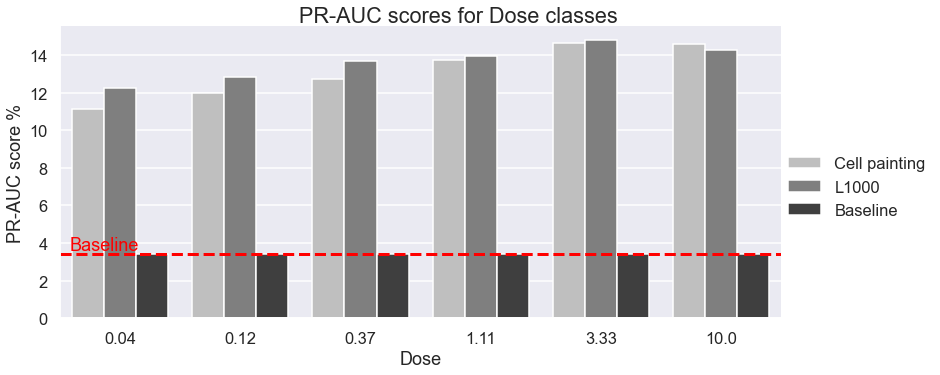

In [74]:
##plot moa predictions PER dose treatment
cat_plt = sns.catplot(x="class", y="values",
                hue="profile_tech", data=df_best_doses, kind="bar", palette="gray_r",
                height=5.4, aspect=2.1)
cat_plt._legend.set_title('')
cat_plt.set_axis_labels("Dose", "PR-AUC score %")
cat_plt.fig.suptitle("PR-AUC scores for Dose classes")
cat_plt.fig.subplots_adjust(top=.93)
plt.savefig(os.path.join(model_preds_figures, "pr_auc_pathway_all_dose.png"))
plt.axhline(dose_baseline, ls='--', linewidth=3, color='red')
plt.text(-0.42,3.65, "Baseline", color='red')

### - Test set MOA Pathways predictions

In [75]:
def evaluate_pathway(actual, pred, pathway):
  """Evaluate model predictions on an individual MOA basis using PR-AUC & ROC-AUC"""
  metrics_dict={}
  metrics_dict['roc_auc_score'] = roc_auc_score(actual.loc[:,pathway], pred.loc[:,pathway], average='macro')
  metrics_dict['pr_auc_score'] = average_precision_score(actual.loc[:,pathway], pred.loc[:,pathway], average="micro")
  return metrics_dict

In [76]:
target_pathways = df_cp_tst_target_pathways.columns.tolist()

In [77]:
pathway_results = {}
for pathway in target_pathways:
  for idx, (assay_name, actual_df) in enumerate(zip(assays, targets_dfs)):
    for mdl, pred_df in zip(model_name, preds_all[idx]):
      model_score = {}
      score_name = pathway + '_' +assay_name + mdl
      pathway_eval_dict = evaluate_pathway(actual_df, pred_df, pathway)
      pathway_results[score_name] = pathway_eval_dict

In [78]:
df_pathway_preds = pd.DataFrame([(k,k1,v1) for k,v in pathway_results.items() for k1,v1 in v.items()], 
                              columns = ['id_name', 'metrics', 'values'])

In [79]:
df_pathway_preds['pathway'] = df_pathway_preds['id_name'].apply(lambda x: x.split('_')[0])
df_pathway_preds['model'] = df_pathway_preds['id_name'].apply(lambda x: x.split('_')[-1])
df_pathway_preds['profile_tech'] = df_pathway_preds['id_name'].apply(lambda x: 'CP_L1000' if len(x.split('_')) == 4 else x.split('_')[1])

In [80]:
df_pathway_preds['model'].unique()

array(['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'mlknnshuf',
       'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf', 'blend'],
      dtype=object)

In [81]:
normal_models

['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'blend']

In [82]:
shuffle_models

['mlknnshuf', 'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf']

In [83]:
df_pathway_preds_normal = df_pathway_preds[df_pathway_preds['model'].isin(normal_models)].reset_index(drop=True)
df_pathway_preds_shuffle = df_pathway_preds[df_pathway_preds['model'].isin(shuffle_models)].reset_index(drop=True)

In [84]:
def get_profile_tech_preds(df):
  """Get dataframes for each profiling assays"""
  df_cp = df[df['profile_tech'] == 'CP'].reset_index(drop=True)
  df_L1 = df[df['profile_tech'] == 'L1000'].reset_index(drop=True)
  # df_cp_L1 = df[df['profile_tech'] == 'CP_L1000'].reset_index(drop=True)
  return df_cp,df_L1

In [85]:
df_pathway_cp_preds, df_pathway_L1_preds = get_profile_tech_preds(df_pathway_preds_normal)
df_pathway_cp_shuf, df_pathway_L1_shuf = get_profile_tech_preds(df_pathway_preds_shuffle)

In [86]:
def get_metric_preds(df_cp,df_L1):
  """Get PR-AUC scores for each profiling assays"""
  df_pr_cp = df_cp[df_cp['metrics'] == 'pr_auc_score'].copy()
  df_pr_L1 = df_L1[df_L1['metrics'] == 'pr_auc_score'].copy()
  # df_pr_cp_L1 = df_cp_L1[df_cp_L1['metrics'] == 'pr_auc_score'].copy()
  return df_pr_cp,df_pr_L1

In [87]:
df_pr_cp_preds, df_pr_L1_preds = get_metric_preds(df_pathway_cp_preds, df_pathway_L1_preds)
df_pr_cp_shuf, df_pr_L1_shuf = get_metric_preds(df_pathway_cp_shuf, df_pathway_L1_shuf)

In [88]:
def top_pathway_auc(df):
  """Choose the best model predictive scores among all model predictions for each MOA"""
  df_max_pathway = df.groupby(['pathway']).agg(['max'])
  df_max_pathway.columns = df_max_pathway.columns.droplevel(1)
  df_max_pathway.rename_axis(None, axis=0, inplace = True)
  df_max_pathway = df_max_pathway.reset_index().rename(columns={"index": "pathway"})
  df_pathway_top_auc = df_max_pathway.sort_values(by='values', ascending = False)
  df_pathway_top_auc.reset_index(drop=True, inplace = True)
  df_pathway_top_auc.drop(['id_name', 'model'], axis = 1, inplace = True)
  return df_pathway_top_auc

In [89]:
df_top_pathway_pr_cp = top_pathway_auc(df_pr_cp_preds)
df_top_pathway_pr_L1 = top_pathway_auc(df_pr_L1_preds)
# df_top_moa_pr_cp_L1 = top_moa_auc(df_pr_cp_L1_preds)

In [90]:
df_shuf_pathway_pr_cp = top_pathway_auc(df_pr_cp_shuf)
df_shuf_pathway_pr_L1 = top_pathway_auc(df_pr_L1_shuf)
# df_shuf_moa_pr_cp_L1 = top_moa_auc(df_pr_cp_L1_shuf)

In [91]:
pathway_cp_baseline = np.mean(df_shuf_pathway_pr_cp['values'])
pathway_L1_baseline = np.mean(df_shuf_pathway_pr_L1['values'])
# moa_cp_L1_baseline = np.mean(df_shuf_moa_pr_cp_L1['values'])

In [92]:
df_pathway_pr_cp = df_top_pathway_pr_cp[['pathway', 'values']].copy()
df_pathway_pr_L1 = df_top_pathway_pr_L1[['pathway', 'values']].copy()
# df_moa_pr_cp_L1 = df_top_moa_pr_cp_L1[['moa', 'values']].copy()

In [93]:
df_pathway_pr_cp.rename(columns={"values": "cp_values"}, inplace = True)
df_pathway_pr_L1.rename(columns={"values": "L1_values"}, inplace = True)
# df_moa_pr_cp_L1.rename(columns={"values": "cp_L1_values"}, inplace = True)

In [94]:
df_pathway_prs = pd.merge(df_pathway_pr_cp, df_pathway_pr_L1, on='pathway')

In [95]:
df_pathway_prs.head(10)

,pathway,cp_values,L1_values
0,GO:0005515,0.466318,0.464202
1,GO:0006325,0.434237,0.353999
2,GO:0030182,0.426665,0.418289
3,GO:0005886,0.424566,0.407845
4,GO:0001046,0.382962,0.314295
5,GO:1900087,0.378999,0.250994
6,GO:0051879,0.342865,0.296653
7,GO:1990239,0.334924,0.313705
8,GO:0005887,0.327728,0.299725
9,GO:0071549,0.319253,0.293906


In [96]:
# Output individual MOA Precision Recall
output_file = pathlib.Path("performance_results/pathway_precision_recall.csv")
df_pathway_prs.to_csv(output_file, index=False)

### - Plot Individual Pathway predictions

##### - Note: The red horizontal and vertical lines are PR-AUC baseline score based on getting the average shuffle moa predictions across all Pathways for each profiling assays i.e. Cell Painting (CP), L1000

In [97]:
def plot_pathway_predictions(df, file_name, col_x, col_y, x_label, y_label, title_label, baseline_x, baseline_y, path=model_preds_figures):
  """Plot Pathway PR-AUC scores for profiling assays"""
  if not os.path.exists(path):
    os.mkdir(path)
  value=((df[col_y] > 0.3) | (df[col_x] > 0.3))
  df['color']= np.where(value==True, "purple", "skyblue")
  plt.figure(figsize=(18,10))
  reg_plt=sns.regplot(data=df, x=col_x, y=col_y, fit_reg=False, marker="o", color="skyblue", scatter_kws={'facecolors':df['color'], 's':100})
  reg_plt.set_title(f"{title_label}, annotating Pathways above 0.3 PR-AUC scores")
  reg_plt.set(xlabel=x_label, ylabel=y_label)
  plt.axhline(baseline_y, ls='--', linewidth=3, color='red', alpha=0.5)
  plt.axvline(baseline_x, ls='--', linewidth=3, color='red', alpha=0.5)
  ##add annotations one by one with a loop
  text = [reg_plt.text(df[col_x][line], df[col_y][line], df.pathway[line],
                       fontdict=dict(color= 'black',size=11.5),) for line in range(df.shape[0]) 
                       if (((df[col_x][line] > 0.3) | (df[col_y][line] > 0.3)))]
  adjust_text(text, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
  plt.savefig(os.path.join(path, file_name))
  plt.show()

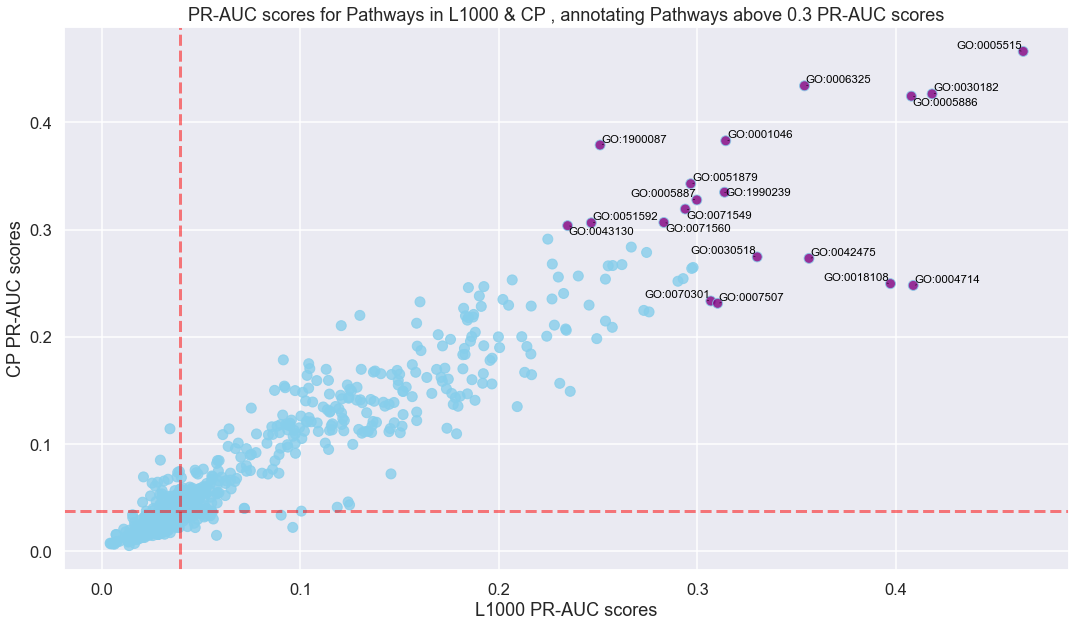

In [98]:
plot_pathway_predictions(df_pathway_prs, 'pr_auc_pathways_cp_vs_L1000.png', 'L1_values', 'cp_values', "L1000 PR-AUC scores", "CP PR-AUC scores", 
                     "PR-AUC scores for Pathways in L1000 & CP ", pathway_L1_baseline, pathway_cp_baseline)